# Workshop 1: Dimensionality Reduction

#### Descripition
This workshop aims to present how to use three algorithms for dimensionality reduction:
1. Singular-Value Decomposition (SVD)
2. Principal Component Analysis (PCA)
3. T-distributed Stochastic Neighbor Embedding (t-sne)

**Curse**: C.SPÉC. : Fouille de Données (Prof. Daniel Aloise, Summer 2018)

**Author**: Rodrigo Randel


## Loading MNIST dataset

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
x_mnist = mnist.data.astype('float64')
y_mnist = mnist.target.astype('int32')
print('Number of samples: %d; Dimension: %d' % (x_mnist.shape[0], x_mnist.shape[1]))

Number of samples: 70000; Dimension: 784


<IPython.core.display.Javascript object>


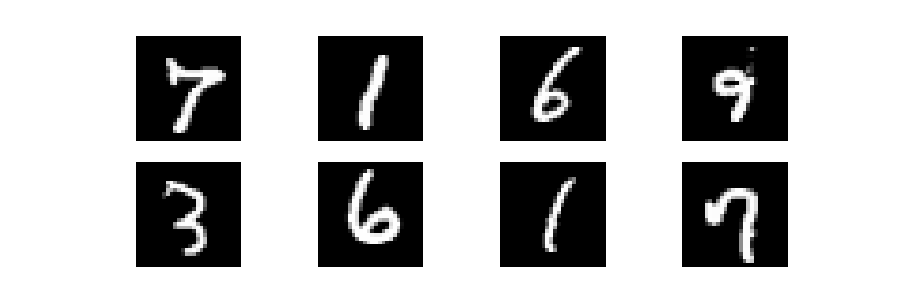

In [77]:
# plot a few samples
nrows = 2
ncols = 4
plot_slice = np.random.choice(len(x_mnist), nrows*ncols, replace=False)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3,1), dpi=300)
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(x_mnist[plot_slice[i*ncols+j]].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off') 
plt.show()

## 1. Singular-Value Decomposition (SVD)
$$A = US V^T $$
If k is the new dimension:

$ A \rightarrow m \times n $

$U \rightarrow m \times k $
    
$S \rightarrow k \times n $
    
$V^T \rightarrow n \times k $

### 1.2 SVD using _sklearn_

In [50]:
from sklearn.decomposition import TruncatedSVD

# Define & Run SVD
svd = TruncatedSVD(n_components=200)
x_svd = svd.fit_transform(x_mnist) # map the data to the new reduced space

print('New dimension = ', x_svd.shape[1])
print('Reduction rate = %.2f%% ' % (100 - 100.0*x_svd.shape[1]/x_mnist.shape[1]))
print('Total Variance Explained = %.2f%%' % (100*np.sum(svd.explained_variance_ratio_)))

New dimension =  200
Reduction rate = 74.49% 
Total Variance Explained = 96.63%


In [49]:
# print('Components:\n\t', svd.components_)
# print('Explained Variance:\n\t', svd.explained_variance_.shape)
# print('Singular Values:\n\t', svd.singular_values_)
# print('Explained Variance Ratio:\n\t', svd.explained_variance_ratio_)

Explained Variance Ratio:
	 [5.84632322e-02 8.26400457e-02 7.15466797e-02 6.11617319e-02
 5.29019474e-02 4.30911588e-02 3.62751767e-02 2.91673216e-02
 2.87290838e-02 2.34908806e-02 2.12680328e-02 2.06347441e-02
 1.70758997e-02 1.70466931e-02 1.59773424e-02 1.49163995e-02
 1.36258088e-02 1.29394811e-02 1.18941113e-02 1.15301364e-02
 1.06607940e-02 1.01002621e-02 9.59905537e-03 9.11251381e-03
 8.84230597e-03 8.39606416e-03 8.11524814e-03 7.85743625e-03
 7.40309878e-03 6.90112575e-03 6.56570687e-03 6.45517603e-03
 6.01011000e-03 5.89681139e-03 5.66831594e-03 5.44164597e-03
 5.04737173e-03 4.87083079e-03 4.78964465e-03 4.67774260e-03
 4.55221333e-03 4.45013660e-03 4.19945211e-03 3.96200046e-03
 3.84252090e-03 3.75849861e-03 3.61447689e-03 3.49147874e-03
 3.39535883e-03 3.20560612e-03 3.19096785e-03 3.10340198e-03
 2.96480853e-03 2.90048142e-03 2.82673157e-03 2.70175359e-03
 2.68750624e-03 2.56845606e-03 2.53251774e-03 2.44649369e-03
 2.40129611e-03 2.38720142e-03 2.29263856e-03 2.20971970e

#### Effects of SVD

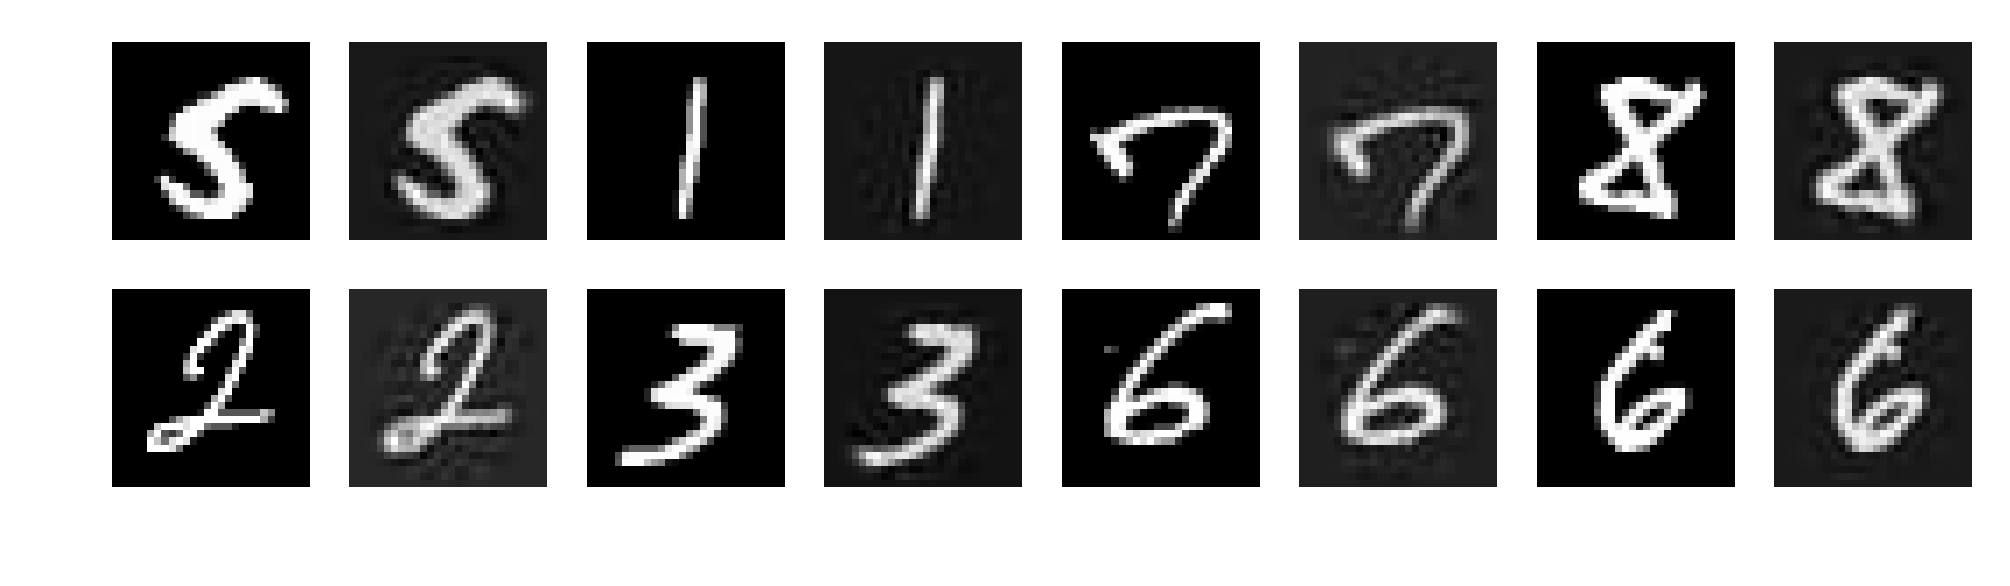

In [51]:
x_svd_inv = svd.inverse_transform(x_svd) 

fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(8,2), dpi=300)
for i in range(nrows):
    for j in range(0,2*ncols,2):
        axes[i, j].imshow(x_mnist[plot_slice[int(i*ncols+j-j/2)]].reshape(28,28), cmap='gray')
        axes[i, j+1].imshow(x_svd_inv[plot_slice[int(i*ncols+j-j/2)]].reshape(28,28), cmap='gray')
        axes[i, j].axis('off')
        axes[i, j+1].axis('off')
plt.show()

### 1.1 SVD using _scipy_

In [52]:
from scipy.sparse.linalg import svds
# apply the decomposition
u,s,vh = svds(A = x_mnist, # mxn data 
           k=200, # new dimension: number of singular values and vectors to compute [1 <= k < min(A.shape)[.  
           return_singular_vectors=True) # Whether or not to compute u and vh. 

In [53]:
print('U shape: ', u.shape)
print('S shape: ', s.shape)
print('V shape: ', vh.shape)

U shape:  (70000, 200)
S shape:  (200,)
V shape:  (200, 784)


## 2. Principal Component Analysis (PCA)

In [54]:
# Nomalize the data
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x_mnist)

In [57]:
from sklearn.decomposition import PCA

# Define & Run PCA
pca = PCA(n_components=10) # int (number of components), float (amount of variance that needs to be explained)
x_pca = pca.fit_transform(x_std)

print('New dimension = ', pca.n_components_)
print('Reduction rate = %.2f%% ' % (100 - 100.0*pca.n_components_/x_mnist.shape[1]))
print('Total Variance Explained = %.2f%%' % (100*np.sum(pca.explained_variance_ratio_)))

New dimension =  10
Reduction rate = 98.72% 
Total Variance Explained = 27.61%


In [ ]:
print('Explained Variance Ratio:\t', pca.explained_variance_ratio_)
print('Number of components:\t', pca.n_components_)

#### Defining a _good_ number of components

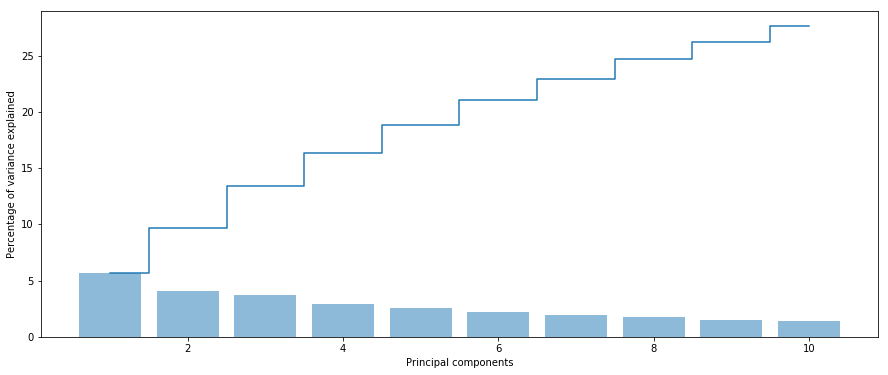

In [58]:
plt.figure(figsize=(15,6))
plt.bar(range(1, pca.n_components_+1), 100*pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, pca.n_components_+1), 100*np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal components')
plt.show()

#### Effects of PCA

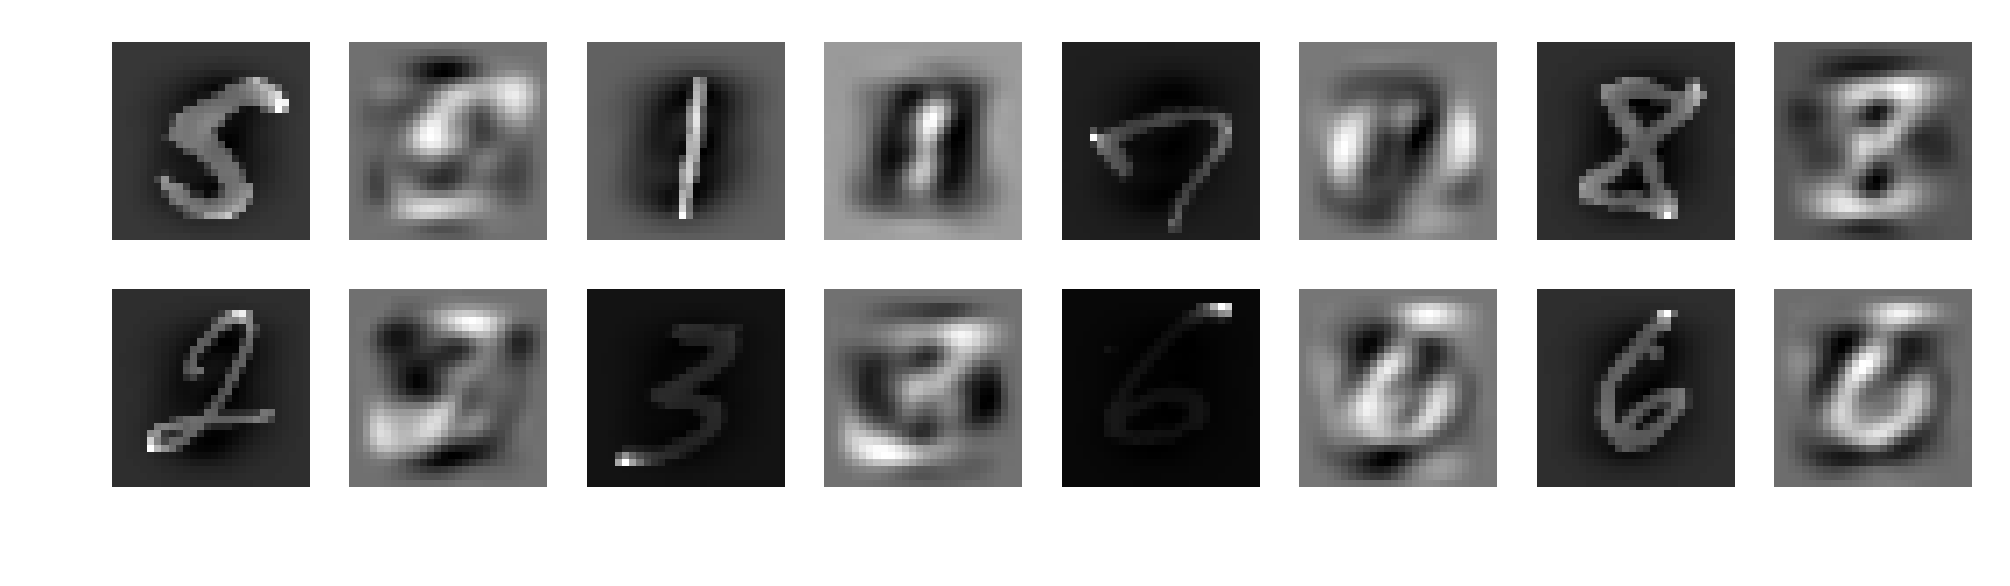

In [59]:
x_pca_inv = pca.inverse_transform(x_pca)

fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(8,2), dpi=300)
for i in range(nrows):
    for j in range(0,2*ncols,2):
        axes[i, j].imshow(x_std[plot_slice[int(i*ncols+j-j/2)]].reshape(28,28), cmap='gray')
        axes[i, j+1].imshow(x_pca_inv[plot_slice[int(i*ncols+j-j/2)]].reshape(28,28), cmap='gray')
        axes[i, j].axis('off')
        axes[i, j+1].axis('off')
plt.show()

## 3. t-distributed Stochastic Neighbor Embedding (t-sne)

#### Motivation

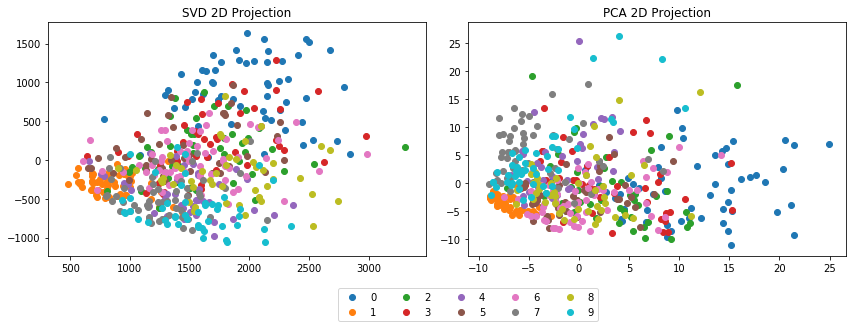

In [60]:
# Selecting 500 examples
selected = np.random.choice(len(x_mnist), 500, replace=False) 

# Run SVD for a 2D-projection
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(x_mnist[selected])

# Run PCA for a 2D-projection
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_std[selected])


# Plot the projections 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
labels = set(y_mnist[selected].tolist())
for l in labels:
    axes[0].scatter(x_svd[y_mnist[selected] == l, 0], x_svd[y_mnist[selected] == l, 1], label=str(l))
    axes[1].scatter(x_pca[y_mnist[selected] == l, 0], x_pca[y_mnist[selected] == l, 1], label=str(l))
axes[0].set_title('SVD 2D Projection')
axes[1].set_title('PCA 2D Projection')    
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.3), ncol=5)
fig.tight_layout() 
plt.show()

#### t-sne

In [ ]:
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
mnist_squared = euclidean_distances(x_mnist[selected], squared=True)

tsne = TSNE(n_components=2, early_exaggeration=12,
                perplexity=100, learning_rate=200,
                n_iter=3000, n_iter_without_progress=300,
               random_state=10, metric='precomputed')
x_tsne = tsne.fit_transform(mnist_squared)

In [ ]:
plt.figure(figsize=(16,8))
labels = set(y_mnist[selected].tolist())
for l in labels:
    plt.scatter(x_tsne[y_mnist[selected] == l, 0], x_tsne[y_mnist[selected] == l, 1], label=str(l))
plt.title('t-sne 2D Projection')
plt.legend(loc='best')
plt.show()

#### 3D Projection

In [80]:
tsne = TSNE(n_components=3, early_exaggeration=12,
                perplexity=100, learning_rate=200,
                n_iter=3000, n_iter_without_progress=300,
               random_state=1, init='pca')
x_tsne_3d = tsne.fit_transform(x_mnist[selected])

<IPython.core.display.Javascript object>


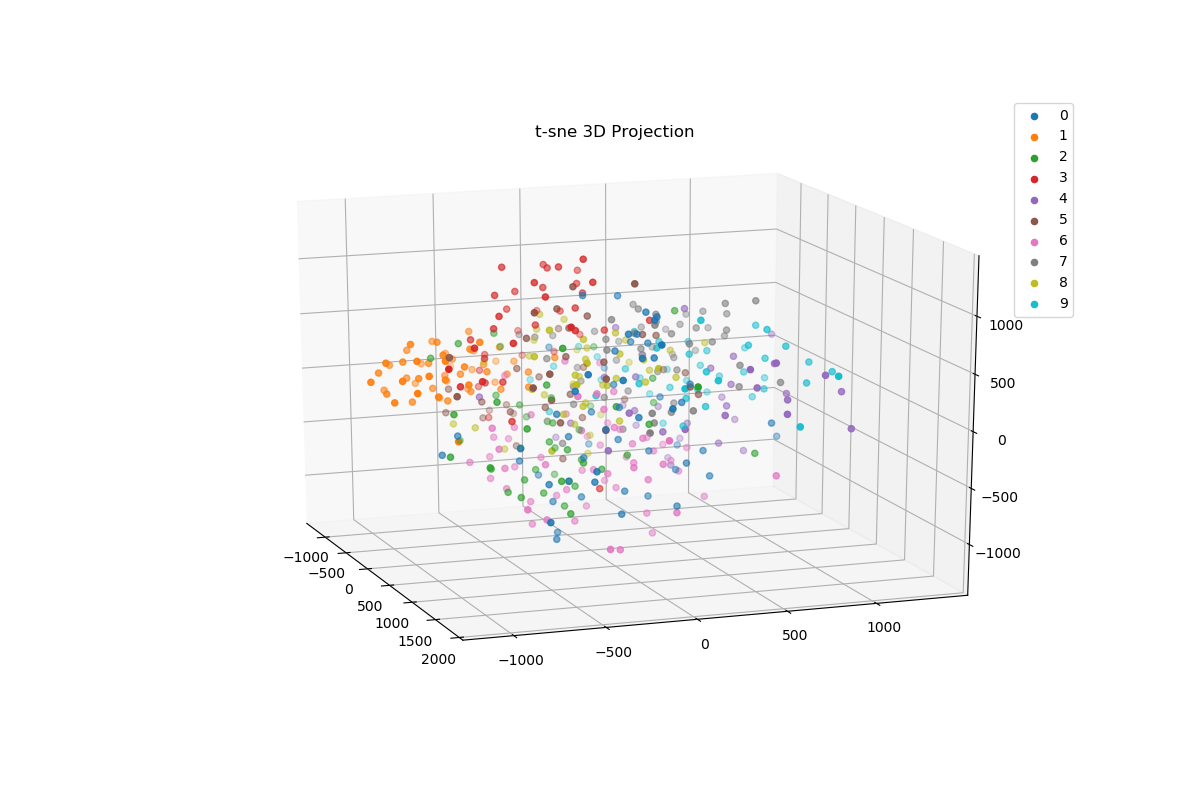

In [81]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
labels = set(y_mnist[selected].tolist())
for l in labels:
    ax.scatter(x_tsne_3d[y_mnist[selected] == l, 0], x_tsne_3d[y_mnist[selected] == l, 1],
                x_tsne_3d[y_mnist[selected] == l, 2], label=str(l))
    
plt.title('t-sne 3D Projection')
plt.legend(loc='best')
plt.show()

In [ ]:
# back to normal plot
%matplotlib inline 